# Decision Tree and Random Forest on Loan data

* Project: Classify and predict whether or not the Lending Club borrower will payback loan in full
* Project Scope: Analyze,Visualize and apply Decision Tree and Random Forest model on loan data
* Data source: Social_Network_Ads.csv file
* The data contains the following columns:
    * credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
    * purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
    * int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    * installment: The monthly installments owed by the borrower if the loan is funded.
    * log.annual.inc: The natural log of the self-reported annual income of the borrower.
    * dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
    * fico: The FICO credit score of the borrower.
    * days.with.cr.line: The number of days the borrower has had a credit line.
    * revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
    * revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
    * inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
    * delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
    * pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Import libraries & Load data

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('loan_data.csv')

## Lets check the data

In [2]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


* We can see there are 14 Columns and its datatypes:
* Out of 14 columns, 13 are input variables/features (X), 1 output /target variable (y) 
* There are 9578 rows/training examples (m)

In [3]:
# Checking for null columns
dataset.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

we see that there are no null data in any columns

In [4]:
# lets check the data
dataset.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


this gives descriptive statistics that sumarize the central tendency of numarical columns

## Let's analyze and visualize data

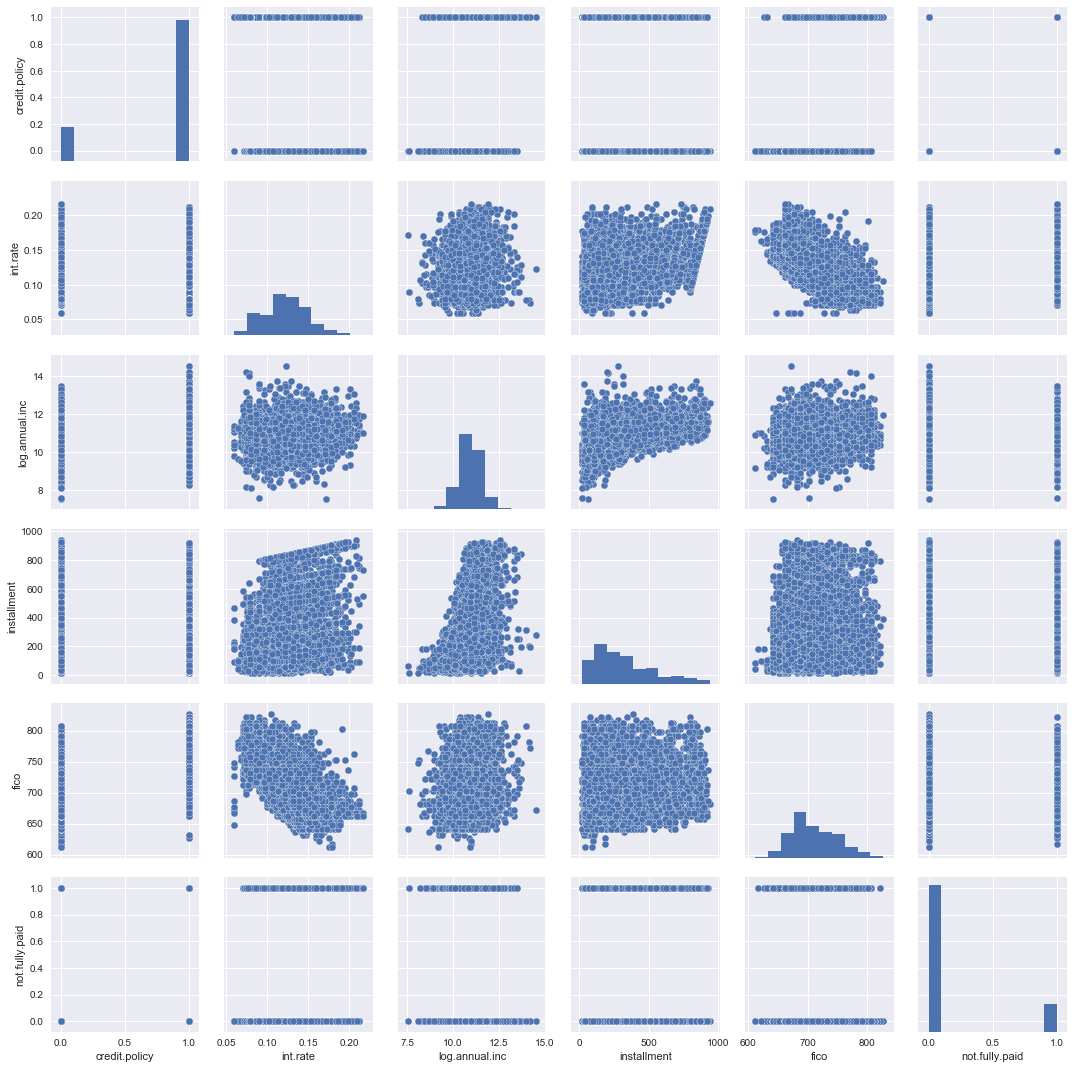

In [6]:
sns.pairplot(dataset[['credit.policy','int.rate','log.annual.inc','installment','fico','not.fully.paid']])
plt.show()

** Loans by purpose and not.fully.paid**

In [7]:
dataset.groupby(['purpose','not.fully.paid']).size()

purpose             not.fully.paid
all_other           0                 1944
                    1                  387
credit_card         0                 1116
                    1                  146
debt_consolidation  0                 3354
                    1                  603
educational         0                  274
                    1                   69
home_improvement    0                  522
                    1                  107
major_purchase      0                  388
                    1                   49
small_business      0                  447
                    1                  172
dtype: int64

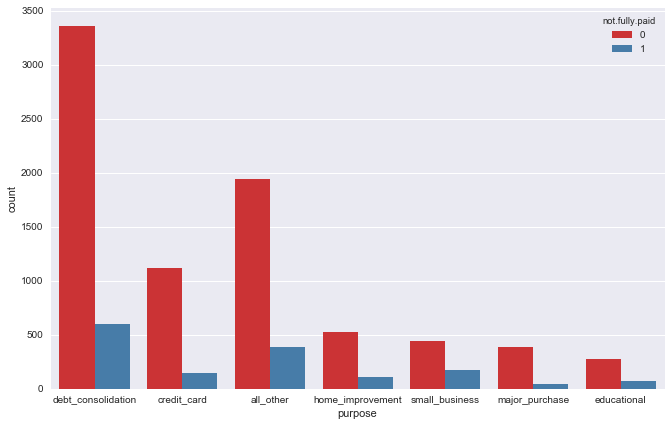

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=dataset,palette='Set1')
plt.show()

we can notice large number of loans are with purpose = debt_consolidation

In [9]:
# Lets see the installment amounts in decending order for loans with purpose = 'debt_consolidation'
dataset[dataset['purpose']== 'debt_consolidation'].sort_values(by='installment',ascending=False).head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9281,0,debt_consolidation,0.2086,940.14,12.569941,18.64,682,4589.958333,18406,50.8,9,0,0,0
9309,0,debt_consolidation,0.1982,926.83,11.587105,20.28,687,4320.958333,14858,99.1,4,0,0,0
7163,1,debt_consolidation,0.1904,916.95,11.461632,16.03,712,5640.041667,33894,99.4,0,0,0,0
6080,1,debt_consolidation,0.1878,913.63,11.461632,18.18,667,5160.000000,15109,77.9,1,0,0,0
6848,1,debt_consolidation,0.1843,909.25,10.896739,10.04,672,3660.000000,1066,20.5,0,0,0,1


** FICO distributions with each not.fully.paid outcome**

In [10]:
dataset.groupby(['fico','not.fully.paid']).size().sort_values(ascending=False).head(10)

fico  not.fully.paid
687   0                 449
682   0                 445
692   0                 418
702   0                 385
697   0                 383
707   0                 371
717   0                 356
677   0                 344
712   0                 338
667   0                 336
dtype: int64

In [11]:
# sum of all not.fully.paid =1
dataset[dataset['not.fully.paid']==1]['fico'].value_counts().sum()

1533

In [12]:
# sum of all not.fully.paid =0
dataset[dataset['not.fully.paid']==0]['fico'].value_counts().sum()

8045

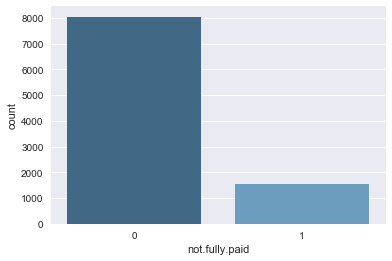

In [13]:
sns.countplot(x = 'not.fully.paid', 
              data = dataset,
              palette ='Blues_d',
              order = dataset['not.fully.paid'].value_counts().index)
plt.show()

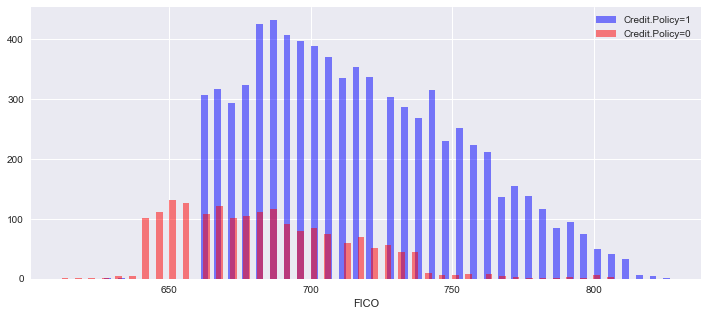

In [14]:
plt.figure(figsize=(12,5))
dataset[dataset['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=82,label='Credit.Policy=1')
dataset[dataset['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=82,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

** FICO score and interest rate **

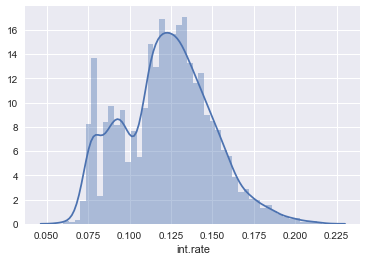

In [15]:
sns.distplot(dataset['int.rate'])
plt.show()

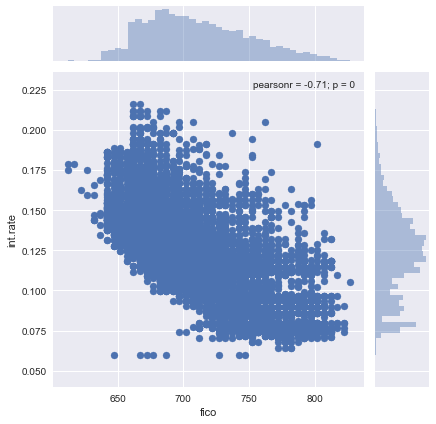

In [16]:
sns.jointplot(x='fico',y='int.rate',data=dataset)
plt.show()

We can see, in general, nterest rate decreases as the fico score increases

** Trend between not.fully.paid and credit.policy with respect o int.rate vs fico **

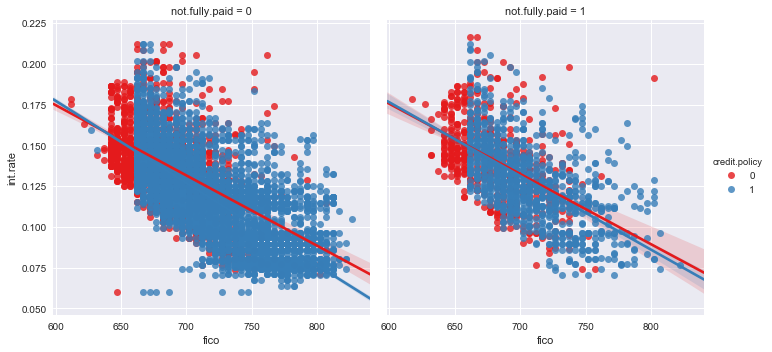

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=dataset,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.show()

** Income vs installment **

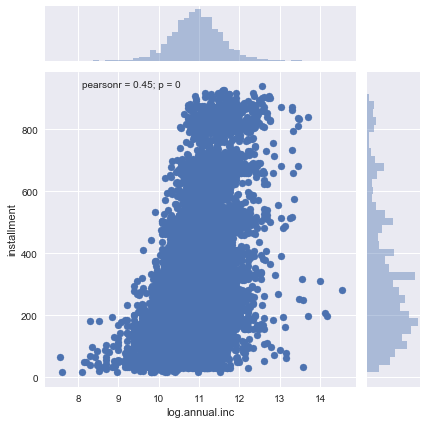

In [18]:
sns.jointplot(x='log.annual.inc',y='installment',data=dataset)
plt.show()

# Implementing the model

** Coverting categorical columns **

If the column got more categories, we can use LabelEncoder and then OneHotEncoder to make the column into binary

** LabelEncoder to convert each category into interger **
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:, 0])

** OneHotEncoder to convert interger into binary **
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

In [19]:
final_dataset = pd.get_dummies(dataset,columns=['purpose'],drop_first=True)

In [20]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop('not.fully.paid',axis=1)
y = final_dataset['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)

In [22]:
# Lets see the training and test sets
for item in [X_train, y_train, X_test, y_test]:
    print(item.shape)

(6704, 18)
(6704,)
(2874, 18)
(2874,)


## Training Decision Tree model

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier_dt = DecisionTreeClassifier(random_state = 99)

In [24]:
classifier_dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(classifier_dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier_dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.731


** Predicting the Test set results and Evaluating the model**

In [25]:
y_pred = classifier_dt.predict(X_test)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1993,  429],
       [ 344,  108]])

In [27]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2422
          1       0.20      0.24      0.22       452

avg / total       0.75      0.73      0.74      2874



To conclude, our model has 75% accuracy in predicting the outcome. For better accuracy we should do feature engineering

** Feature importance**

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1

In [28]:
print("Feature importances:\n{}".format(classifier_dt.feature_importances_))

Feature importances:
[0.02917005 0.09661498 0.1242012  0.12809724 0.10620379 0.06700039
 0.12329944 0.10187356 0.12185212 0.0342912  0.01161502 0.01013457
 0.0077278  0.01359697 0.00875986 0.00633942 0.00337199 0.00585042]


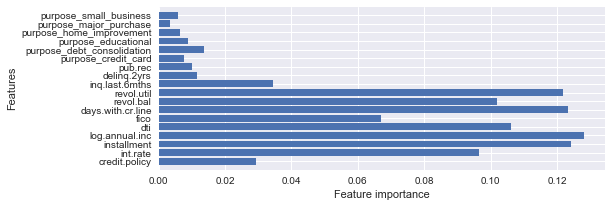

In [29]:
# Visualizing the feature importances
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,3))
    n_features = 18
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(classifier_dt)
plt.savefig('feature_importance')

## Training the Random Forest model

In [30]:
# Importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier(random_state = 99)

** Fitting the training data **

In [31]:
classifier.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.832


** Predicting Test results **

In [32]:
y_pred = classifier.predict(X_test)

** Evaluating test results **

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2367,   55],
       [ 427,   25]])

In [34]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91      2422
          1       0.31      0.06      0.09       452

avg / total       0.76      0.83      0.78      2874



** Feature importance **

In [35]:
print("Feature importances:\n{}".format(classifier.feature_importances_))

Feature importances:
[0.01336435 0.107584   0.10971396 0.11368745 0.11090546 0.07453414
 0.11384805 0.11473399 0.10920871 0.05576554 0.01555948 0.009514
 0.00907839 0.01564839 0.00769783 0.00717566 0.00370987 0.00827076]


In [38]:
feature_importances= pd.DataFrame(classifier.feature_importances_*100,X.columns,columns=['Importances'])
feature_importances

,Importances
credit.policy,1.336435
int.rate,10.758400
installment,10.971396
log.annual.inc,11.368745
dti,11.090546
fico,7.453414
days.with.cr.line,11.384805
revol.bal,11.473399
revol.util,10.920871
inq.last.6mths,5.576554


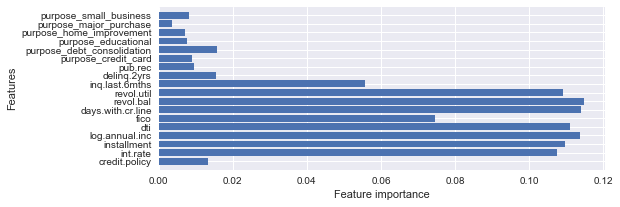

In [37]:
# Visualizing the feature importances
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,3))
    n_features = 18
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(classifier)
plt.savefig('feature_importance')

To conclude, Random Forest model has better accuracy than Decision tree in predicting the outcome. For even better accuracy we should do feature engineering on these models. Finally, we can see the list of inputs that impacts most in predicting the outcome